In [1]:
from model.diffusion import FEADataset, Trainer

/home/namanwsl/code/fea-diffusion/model/diffusion.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [7]:
dataset = FEADataset(
    folder='data/feadata2500',
    augmentation=False,
    image_size=64,
)
print(len(dataset))

100000


In [3]:
# from tqdm.auto import tqdm
# startindex = 0
# errors = []
# for i in tqdm(range(startindex, len(dataset)), total=len(dataset), initial=startindex):
#     plate_index = (i // (dataset.samples_per_plate)) + 1
#     try:
#         x = dataset[i]
#     except Exception as e:
#         errors.append(plate_index) if plate_index not in errors else None

In [4]:
# print(len(errors))
# print(errors)

In [3]:
import torchvision.transforms.functional as TF
import torch
def unnormalize_from_negative_one_to_one(tensor):
        return (tensor + 1.0) / 2.0
def create_view_friendly_image(image):
        image = unnormalize_from_negative_one_to_one(image)
        # image = TF.invert(image)
        image = image * 255.0
        # image = image.repeat(3, 1, 1)
        # image = TF.to_pil_image(image, mode='F')
        return image

In [6]:
# import torchvision.transforms.functional as TF
# import torch
# def unnormalize_from_negative_one_to_one(tensor):
#         return (tensor + 1.0) / 2.0
# def create_view_friendly_image(image):
#         image = unnormalize_from_negative_one_to_one(image)
#         image = TF.invert(image)
#         image = image * 255.0
#         # image = image.repeat(3, 1, 1)
#         image = TF.to_pil_image(image)
#         return image

In [8]:
index = 1008
sample = dataset[index]
# for key, value in sample.items():
    # print(key, value.shape)
print(sample['plate_index'], sample['condition_index'], sample['iteration_index'])

tensor(26) tensor(1) tensor(9)


In [31]:
print(torch.unique(unnormalize_from_negative_one_to_one(sample['geometry'])))
print(unnormalize_from_negative_one_to_one(sample['geometry']))

tensor([0., 1.])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [32]:
# sample['geometry'] = (unnormalize_from_negative_one_to_one(sample['geometry']) > 0.5).float()

In [9]:
# sample['displacement'] = sample['displacement'] * (1.0 - unnormalize_from_negative_one_to_one(sample['constraints']))
 
# error = sample['displacement'] * (1.0 - unnormalize_from_negative_one_to_one(sample['constraints']))
sample['displacement'] = unnormalize_from_negative_one_to_one(sample['displacement']) * unnormalize_from_negative_one_to_one(sample['geometry'])
sample['displacement'] = (sample['displacement'] * 2.0) - 1.0
# sample['displacement'] = sample['displacement'] - error

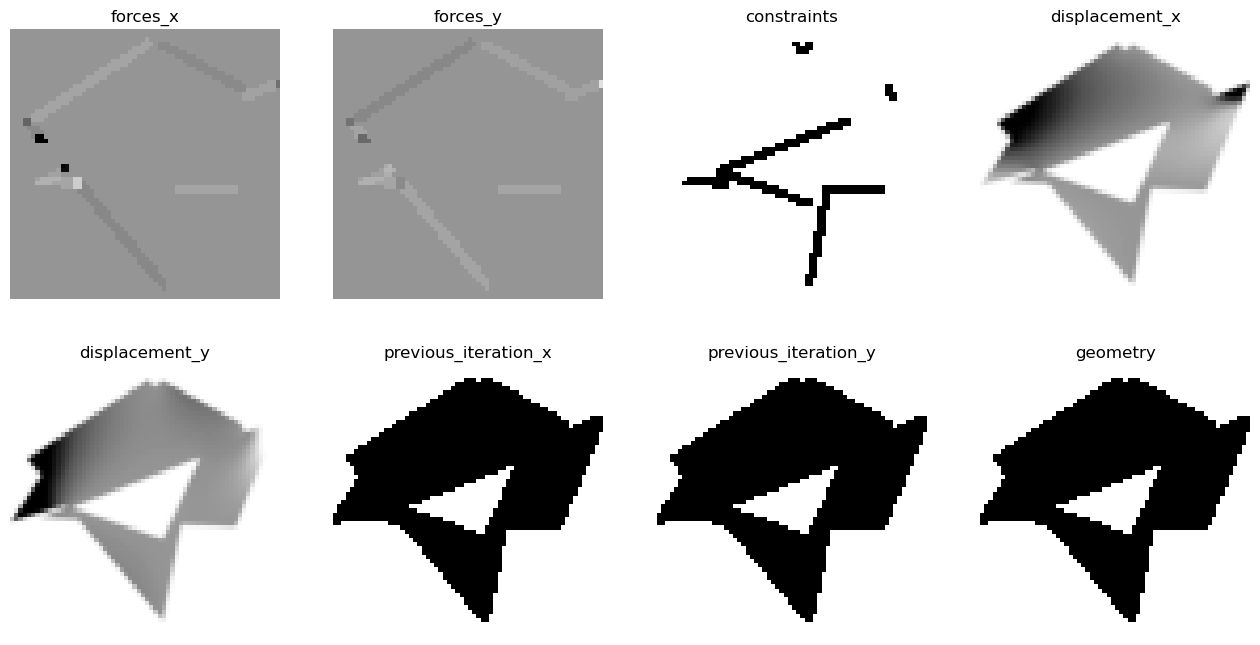

In [10]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16, 8))
index = 1
for key, value in reversed(sample.items()):
    if value.shape.numel() == 1:
        continue
    if value.shape[0] == 2:
        figure.add_subplot(2, 4, index)
        plt.title(key + "_x")
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[0][None, ...]))
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys', vmin=0, vmax=255)
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        figure.add_subplot(2, 4, index)
        plt.title(key + "_y")
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[1][None, ...]))
        plt.imshow(create_view_friendly_image(value[1][None, ...]).squeeze(), cmap='Greys', vmin=0, vmax=255)
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
    else:
        figure.add_subplot(2, 4, index)
        plt.title(key)
        plt.axis("off")
        # plt.imshow(create_view_friendly_image(value[0][None, ...]))
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys', vmin=0, vmax=255)
        # plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        